## 拒绝采样
[参考](https://www.zhihu.com/question/425749668/answer/1803921453)

蒙特卡洛方法通过采样的方式来随机近似，但是当分布 $p(z|x)$ 比较复杂时，很难从中采样出服从概率分布的一组样本点。<br>
于是派生出了两种方法，接受-拒绝采样和重要性采样。通过引入一个提议分布 $q(z)$ ，解决目标分布 $p(z)$ 无法直接采样的问题。<br>
提议分布是容易采样的分布，可以是任意的，如高斯分布、均匀分布等。

假设要采样的目标分布是<br>
$p(x)=(0.3e^{(-(x-0.3)^2)}+0.7e^{(-(x-2)^2/0.3)})/1.2113$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import seaborn
seaborn.set()

In [8]:
# 目标采样概率密度函数
def p(x):
    return (0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x-2.) ** 2 / 0.3)) / 1.2113

拒绝接受采样<br>
目的：根据给定的概率密度函数 $p(x)$ ，产生服从目标分布的样本集 $X$ <br>
提议分布 $G$ ：其概率密度函数是 $g(y)$ ，该分布可以是任意的，最好是容易通过计算机去采样的分布类型<br>
常数值 $C$ ：使得对任意变量 $x$ 都有 $C*g(x)\geq p(x)$ ，为提高采样效率，C在满足条件的情况下越小越好。<br>

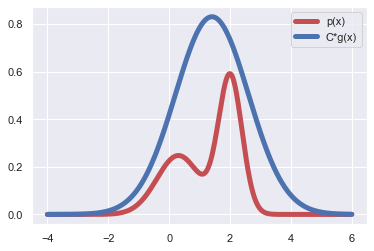

In [9]:
# 建议分布
norm_rv = norm(loc=1.4, scale=1.2)
C = 2.5

x = np.arange(-4., 6., 0.01)
plt.plot(x, p(x), color='r', lw=5, label='p(x)')
plt.plot(x, C*norm_rv.pdf(x), color='b', lw=5, label='C*g(x)')
plt.legend()
plt.show()

### 采样过程
1. 从建议分布 $G$ 中进行采样，获取采样样本 $Y$ 
2. 从[0,1]均匀分布进行采样，获取一个采样样本 $U$ 
3. 如果 $\frac{p(Y)}{C*g(Y)} \geq U$ ，接受这个采样值 $Y$ ，记录该采样值，否则拒绝这个采样值

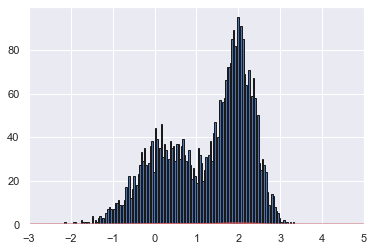

In [10]:
uniform_rv = uniform(loc=0, scale=1)
sample = []

for i in range(10000):
    Y = norm_rv.rvs(1)[0]
    U = uniform_rv.rvs(1)[0]
    if p(Y) >= U * C * norm_rv.pdf(Y):
        sample.append(Y)

X = np.arange(-3,0.5,0.01)
plt.gca().axes.set_xlim(-3,5)
plt.plot(x, p(x), color='r')
plt.hist(sample, color='b', bins=150, edgecolor='k')
plt.show()

$\frac{p(Y)}{C*g(Y)} \geq U$ 做整理变成 $p(Y) \geq Cg(Y)U $ <br>
证明目标是基于接受-拒绝后的建议分布概率密度函数和目标分布的概率密度函数相等
$$ p(Y \leq y|U \leq \frac {p(Y)}{C*g(Y)}) = F(y) $$